# Importing necessary libraries

In [240]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

# Basic info on the Data

In [132]:
df = pd.read_csv("/Users/twmrgwzln/Downloads/corona_tested_individuals_ver_00225.csv")

In [133]:
#df = pd.read_csv("C:\\Project\\corona_tested_individuals_ver_00225.csv")


In [134]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
9053443,2020-03-11,0,1,0,1,0,שלילי,NaN,NaN,Abroad
9053444,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053445,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053446,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9053448 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 690.7+ MB


In [136]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other


### We will now change all the string data to int data:
Female will be 0, male will be 1.
<br> Negative will be 0, positive will be 1.
<br> Under age 60 will be 0, Above will be 1

In [137]:
df.drop(df[df['corona_result'] == "אחר"].index, inplace = True)

In [138]:
df['gender'] = df['gender'].replace({"זכר": 1, "נקבה": 0})
df['corona_result'] = df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
df['age_60_and_above'] = df['age_60_and_above'].replace({"Yes": 1, "No": 0})


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8858382 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   test_date            object 
 1   cough                int64  
 2   fever                int64  
 3   sore_throat          int64  
 4   shortness_of_breath  int64  
 5   head_ache            int64  
 6   corona_result        int64  
 7   age_60_and_above     float64
 8   gender               float64
 9   test_indication      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 743.4+ MB


In [140]:
df[df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,908643.000000,908643.000000,908643.000000,908643.000000,908643.000000,908643.0,873113.000000,854545.000000
mean,0.142531,0.121596,0.065954,0.017223,0.127806,1.0,0.127039,0.483181
std,0.349594,0.326818,0.248203,0.130103,0.333874,0.0,0.333016,0.499717
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [141]:
df[df['corona_result']==0].describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7949739.0,6.109333e+06,6.485047e+06
mean,3.526871e-02,2.565342e-02,1.340597e-02,2.387500e-03,2.584274e-02,0.0,1.333741e-01,4.829492e-01
std,1.844582e-01,1.580991e-01,1.150055e-01,4.880369e-02,1.586660e-01,0.0,3.399787e-01,4.997092e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00


In [142]:
df['gender'].value_counts()

0.0    3794744
1.0    3544848
Name: gender, dtype: int64

### Now we will clean all the NaN Data

In [143]:
df.isnull().sum()
df = df.dropna()

In [144]:
df.shape

(6207383, 10)

After we cleaned around 3 milions row of the data, we can still see we have alot of data. we will take a sample from the data that feature distributions are preserved.

In [145]:

sample_df = df.sample(int(len(df) * 0.002))
sample_df.shape


(12414, 10)

In [146]:
sample_df.drop(sample_df[sample_df['corona_result'] == "אחר"].index, inplace = True)

In [147]:
sample_df['gender'] = sample_df['gender'].replace({"זכר": 1, "נקבה": 0})
sample_df['corona_result'] = sample_df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
sample_df['age_60_and_above'] = sample_df['age_60_and_above'].replace({"Yes": 1, "No": 0})

In [148]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 4930647 to 5130747
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            12414 non-null  object 
 1   cough                12414 non-null  int64  
 2   fever                12414 non-null  int64  
 3   sore_throat          12414 non-null  int64  
 4   shortness_of_breath  12414 non-null  int64  
 5   head_ache            12414 non-null  int64  
 6   corona_result        12414 non-null  int64  
 7   age_60_and_above     12414 non-null  float64
 8   gender               12414 non-null  float64
 9   test_indication      12414 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


### info about the sample data

In [149]:
sample_df['gender'].value_counts()

0.0    6305
1.0    6109
Name: gender, dtype: int64

In [150]:
cough_sample = sample_df['cough'] == 1
fever_sample = sample_df['fever'] == 1
sore_throat_sample = sample_df['sore_throat']== 1
shortness_of_breath_sample = sample_df['shortness_of_breath']==1
head_ache_sample = sample_df['head_ache']==1
corona_result_sample = sample_df['corona_result']==1
age_60_and_above_sample = sample_df['age_60_and_above']==1

cough_sample = cough_sample.sum()
fever_sample =fever_sample.sum()
sore_throat_sample=sore_throat_sample.sum()
shortness_of_breath_sample=shortness_of_breath_sample.sum()
head_ache_sample=head_ache_sample.sum()
corona_result_sample=corona_result_sample.sum()
age_60_and_above_sample=age_60_and_above_sample.sum()

In [151]:
Distribution_sample={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache', 'corona_result','age_60_and_above'],
                     'count':[cough_sample,fever_sample,sore_throat_sample,shortness_of_breath_sample,head_ache_sample,corona_result_sample,age_60_and_above_sample]}

Distribution_sample=pd.DataFrame(data=Distribution_sample,index=range(7))
Distribution_sample

,colums,count
0,cough,627
1,fever,506
2,sore_throat,269
3,shortness_of_breath,54
4,head_ache,526
5,corona_result,1651
6,age_60_and_above,1595


In [152]:
cough = df['cough'] == 1
fever = df['fever'] == 1
sore_throat = df['sore_throat']== 1
shortness_of_breath = df['shortness_of_breath']==1
head_ache = df['head_ache']==1
corona_result = df['corona_result']==1
age_60_and_above = df['age_60_and_above']==1

cough = cough.sum()
fever =fever.sum()
sore_throat=sore_throat.sum()
shortness_of_breath=shortness_of_breath.sum()
head_ache=head_ache.sum()
corona_result=corona_result.sum()
age_60_and_above=age_60_and_above.sum()

In [153]:
Distribution_orginal={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache','corona_result','age_60_and_above'],
                      'count':[cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above]}

Distribution_orginal=pd.DataFrame(data=Distribution_orginal,index=range(7))
Distribution_orginal

,colums,count
0,cough,312000
1,fever,242341
2,sore_throat,132744
3,shortness_of_breath,26675
4,head_ache,258328
5,corona_result,826347
6,age_60_and_above,809527


Text(0.5, 1.0, 'Distribution_sample')

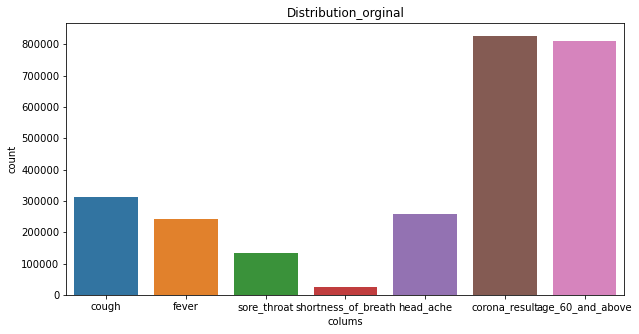

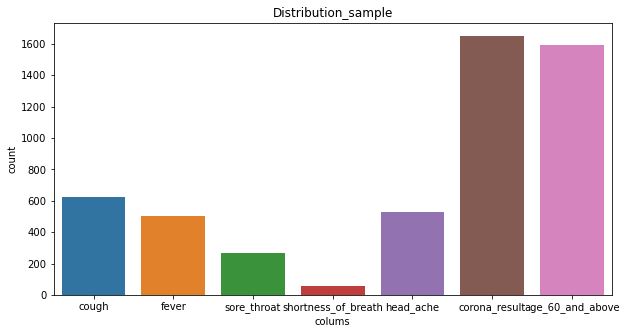

In [154]:
fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_orginal).set_title('Distribution_orginal')

fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_sample).set_title('Distribution_sample')

In [155]:
sample_df[sample_df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.0,1651.000000,1651.000000
mean,0.137492,0.110236,0.066021,0.015142,0.125379,1.0,0.121744,0.501514
std,0.344471,0.313279,0.248393,0.122156,0.331248,0.0,0.327089,0.500149
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [156]:
sample_df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
4930647,2021-01-09,0,0,0,0,0,0,0.0,1.0,Other
8251015,2020-07-05,0,0,0,0,0,0,0.0,1.0,Other
585090,2022-01-16,0,0,0,0,0,0,0.0,1.0,Other
3952200,2021-03-06,0,0,0,0,0,0,0.0,1.0,Other
2699242,2021-07-30,0,0,0,0,0,0,0.0,0.0,Other


In [157]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 4930647 to 5130747
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            12414 non-null  object 
 1   cough                12414 non-null  int64  
 2   fever                12414 non-null  int64  
 3   sore_throat          12414 non-null  int64  
 4   shortness_of_breath  12414 non-null  int64  
 5   head_ache            12414 non-null  int64  
 6   corona_result        12414 non-null  int64  
 7   age_60_and_above     12414 non-null  float64
 8   gender               12414 non-null  float64
 9   test_indication      12414 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


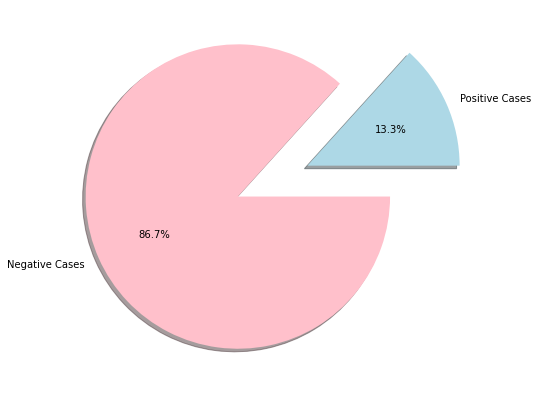

In [158]:
sample_df_negative = sample_df['corona_result'] == 0
sample_df_positive = sample_df['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [sample_df_positive.sum(), sample_df_negative.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)


plt.show()

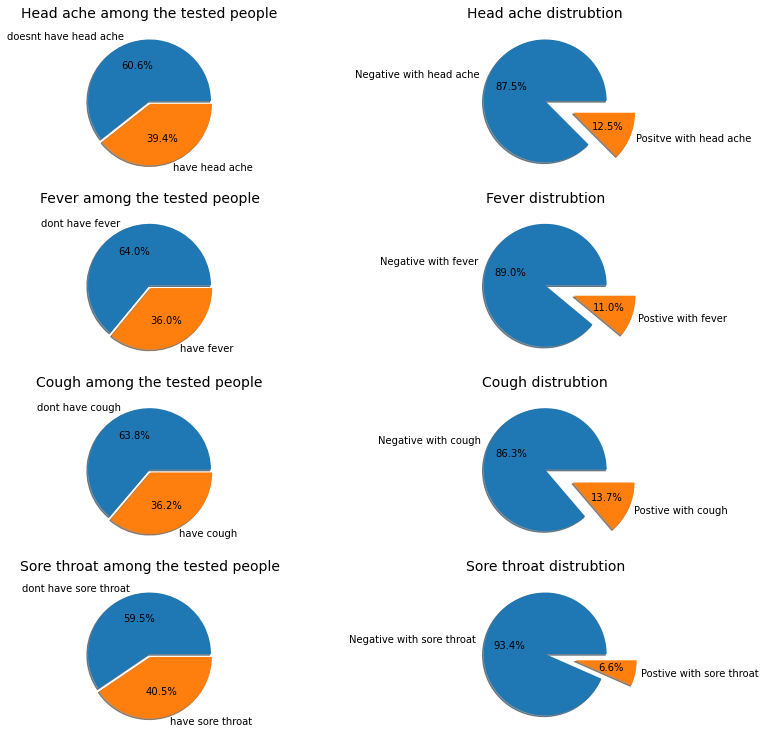

In [159]:
fig, ax = plt.subplots(4,2 ,figsize = (13,13))
((ax1, ax2) , (ax3, ax4),(ax5, ax6) , (ax7, ax8)) = ax
labels = ["doesnt have head ache ", "have head ache"]
values = sample_df[(sample_df['head_ache']==1)]['corona_result'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax1.set_title("Head ache among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with head ache ", "Positve with head ache"]
values = sample_df[(sample_df['corona_result']==1)]['head_ache'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax2.set_title("Head ache distrubtion", fontdict={'fontsize': 14})

labels = ["dont have fever", "have fever"]
values = sample_df[(sample_df['fever']==1)]['corona_result'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax3.set_title("Fever among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with fever ", "Postive with fever"]
values = sample_df[(sample_df['corona_result']==1)]['fever'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax4.set_title("Fever distrubtion", fontdict={'fontsize': 14})

labels = ["dont have cough", "have cough"]
values = sample_df[(sample_df['cough']==1)]['corona_result'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax5.set_title("Cough among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with cough ", "Postive with cough"]
values = sample_df[(sample_df['corona_result']==1)]['cough'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax6.set_title("Cough distrubtion", fontdict={'fontsize': 14})

labels = ["dont have sore throat", "have sore throat"]
values = sample_df[(sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax7.set_title("Sore throat among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with sore throat ", "Postive with sore throat"]
values = sample_df[(sample_df['corona_result']==1)]['sore_throat'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax8.set_title("Sore throat distrubtion", fontdict={'fontsize': 14})


plt.show()

# Corolation

In [160]:
sample_df.corr()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
cough,1.000000,0.372883,0.289054,0.174797,0.342275,0.155571,0.066440,-0.007027
fever,0.372883,1.000000,0.195957,0.122561,0.310562,0.137612,0.012159,0.004885
sore_throat,0.289054,0.195957,1.000000,0.074231,0.320255,0.119303,0.037097,-0.014803
shortness_of_breath,0.174797,0.122561,0.074231,1.000000,0.138011,0.064229,0.007542,-0.006301
head_ache,0.342275,0.310562,0.320255,0.138011,1.000000,0.161394,0.000499,-0.031074
corona_result,0.155571,0.137612,0.119303,0.064229,0.161394,1.000000,-0.007888,0.007371
age_60_and_above,0.066440,0.012159,0.037097,0.007542,0.000499,-0.007888,1.000000,-0.028365
gender,-0.007027,0.004885,-0.014803,-0.006301,-0.031074,0.007371,-0.028365,1.000000


<AxesSubplot:>

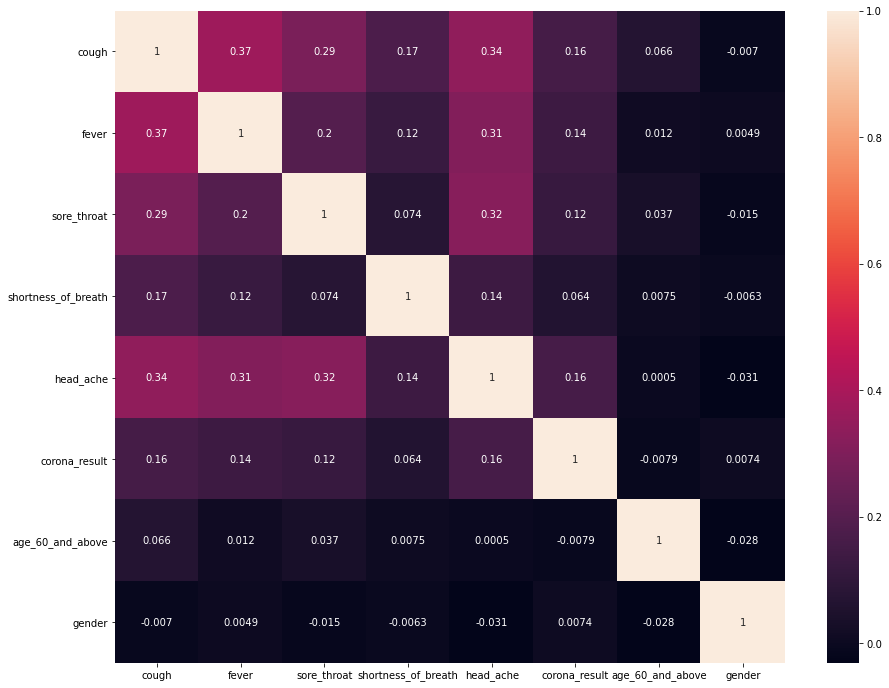

In [161]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(sample_df[['cough', 'fever', 'sore_throat', 'shortness_of_breath' ,'head_ache','corona_result','age_60_and_above', 'gender']].corr(),annot=True)

### Conclusion
Using the hot map we noticed that there is no correlation between the following parameters:
- Gender
- Over the age of 60
- Indication for testing

So we decided to delete them.

In [162]:
sample_df.drop(['age_60_and_above','gender' , 'test_indication','test_date'], axis=1, inplace=True)


Among the variables that have a correlation we will see in a pie chart

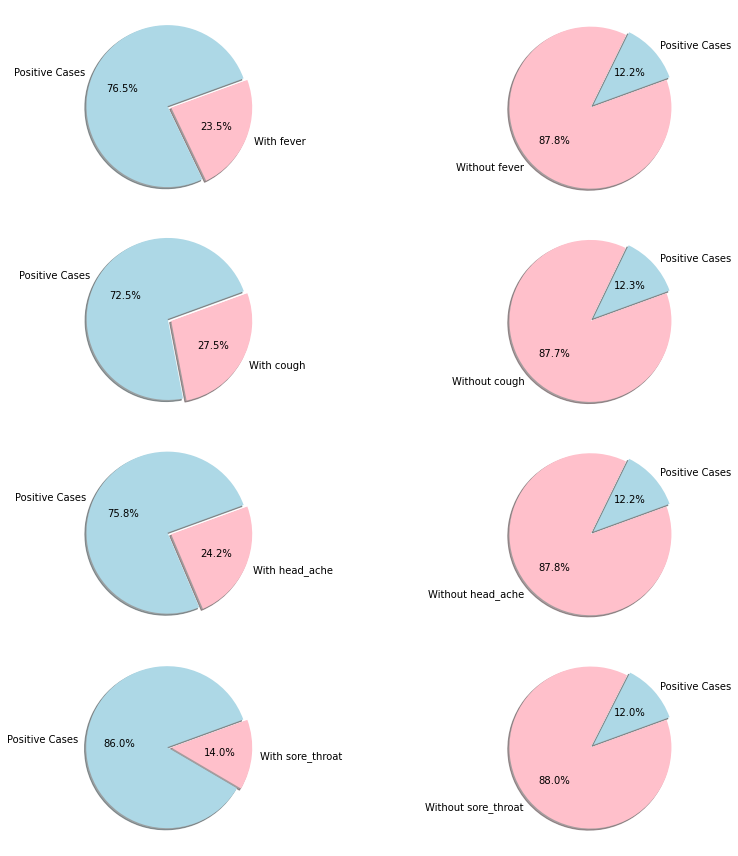

In [163]:
fig, ax = plt.subplots(4,2 ,figsize = (12,12))
((ax1, ax5) , (ax2, ax6),(ax3, ax7) , (ax4, ax8)) = ax

sample_df_fever = sample_df['fever'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_cough = sample_df['cough'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax3.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax4.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_fever = sample_df['fever'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax5.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_cough = sample_df['cough'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax6.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax7.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax8.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

plt.tight_layout()
plt.show()


#  Train Test Split

In [164]:
X = sample_df.drop(columns=['corona_result'])
Y = sample_df['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1111)

In [165]:
print(X_test.shape)
print(X_train.shape)

(2483, 5)
(9931, 5)


### Dummy model

In [166]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, Y)


0.867004994361205

### We figured out that the data is imbalanced so we decied to add Synthetic data

In [167]:
from sklearn.utils import resample


df_1 = sample_df[sample_df.corona_result==1]
df_2 = sample_df[sample_df.corona_result==0]

 
# Upsample minority class
df_1_upsampled = resample(df_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=10721,    # to match majority class
                                 random_state=1) # reproducible results

df_upsampled = pd.concat([df_1_upsampled, df_2])
 

df_upsampled.corona_result.value_counts()

0    10763
1    10721
Name: corona_result, dtype: int64

In [168]:
X = df_upsampled.drop(columns=['corona_result'])
Y =df_upsampled['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

In [169]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, Y)

0.5009774716067772

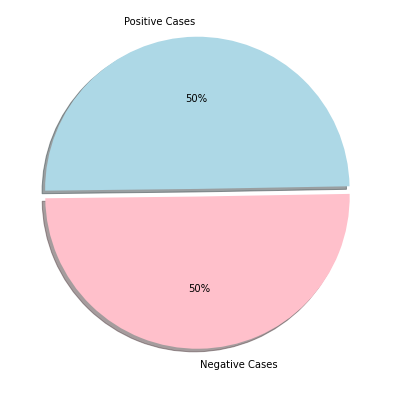

In [170]:
sample_df_negative = df_upsampled['corona_result'] == 0
sample_df_positive = df_upsampled['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [sample_df_positive.sum(), sample_df_negative.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.f%%', shadow=True, startangle=1)


plt.show()

# KNN

In [234]:
model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
confusion_matrix=metrics.confusion_matrix(prediction,y_test)
confusion_matrix

print(classification_report(y_test, prediction))
roc_auc_score(y_test, prediction)


Accuracy: 0.5866883872469164
              precision    recall  f1-score   support

           0       0.55      0.94      0.69      2108
           1       0.81      0.25      0.38      2189

    accuracy                           0.59      4297
   macro avg       0.68      0.59      0.53      4297
weighted avg       0.68      0.59      0.53      4297



0.5932118761827077

Text(0, 0.5, 'Testing Accuracy')

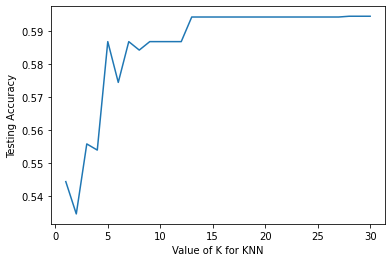

In [226]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    scores.append(metrics.accuracy_score(prediction, y_test))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [227]:
best_model = KNeighborsClassifier(n_neighbors=16, metric='manhattan', weights='distance')
best_model.fit(X_train,y_train)
prediction=best_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.5941354433325576


In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
best_model = clf.fit(X_train,y_train)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
knn=KNeighborsClassifier()
k_range = list(range(2,31))
weight_options = ['uniform', 'distance']
metrics_options = ['euclidean', 'manhattan']
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metrics_options)
grid=GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

# Forest

In [ ]:
random_for = RandomForestClassifier()
randomfor_score = cross_val_score(random_for, products, category, cv=kf, scoring='accuracy').mean()
print(randomfor_score)

## ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

-True Positive Rate
-False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
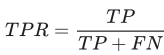

False Positive Rate (FPR) is defined as follows:
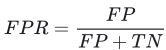